# Predicting the best Sephora skincare product based on customer physical attributes

DSCI 303: Machine Learning for Data Science

Joshua Fang and Huijun Mao

## Data description
Source: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

This dataset was collected via Python scraper in March 2023 and contains:

* information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
* user reviews (about 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

## Set up

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data sets

In [2]:
import os

# Get current working directory
path = os.getcwd()

# Go to parent directory
parent = os.path.abspath(os.path.join(path, os.pardir))

# Go to Downloads
downloads = os.path.join(parent, 'Downloads')

# Go to archive folder
archive = os.path.join(downloads, 'archive')
print(archive)

C:\Users\joshu\Downloads\archive


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load product information data
products = pd.read_csv(os.path.join(archive, 'product_info.csv'))

# Load reviews data
reviews0_250 = pd.read_csv(os.path.join(archive,'reviews_0-250.csv'))
reviews250_500 = pd.read_csv(os.path.join(archive,'reviews_250-500.csv'))
reviews500_750 = pd.read_csv(os.path.join(archive,'reviews_500-750.csv'))
reviews750_1250 = pd.read_csv(os.path.join(archive,'reviews_750-1250.csv'))
reviews1250_end = pd.read_csv(os.path.join(archive,'reviews_1250-end.csv'))

## Data wrangling

In [4]:
# Merge all reviews together
total_reviews = pd.concat([reviews0_250, reviews250_500, reviews500_750, reviews750_1250, reviews1250_end], ignore_index=True)

## Data exploration

In [25]:
# Get dimensions of each data frame
print(products.shape)
print(total_reviews.shape)

(8494, 27)
(1094411, 19)


In [26]:
# Take a look at what kinds of products are there
products['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

In [27]:
# Examine secondary categories
products['secondary_category'].unique()

array(['Value & Gift Sets', 'Women', 'Body Moisturizers', 'Fragrance',
       'Men', 'Candles & Home Scents', 'Body Care',
       'Hair Styling & Treatments', 'Shampoo & Conditioner', 'Mini Size',
       'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Skincare', 'Face', 'Eye', 'Cheek', 'Hair', 'Tools',
       'Brushes & Applicators', 'Makeup Palettes', 'Beauty Tools',
       'Accessories', 'Makeup', 'Bath & Shower', 'Wellness',
       'High Tech Tools', 'Shop by Concern', nan, 'Self Tanners',
       'Shaving', 'Hair Tools', 'Nail', 'Beauty Accessories',
       'Beauty Supplements', 'Other Needs', 'Bath & Body'], dtype=object)

In [28]:
# Examine teriary categories
products['tertiary_category'].unique()

array(['Perfume Gift Sets', 'Perfume', 'Rollerballs & Travel Size',
       'Body Lotions & Body Oils', nan, 'Cologne', 'Diffusers',
       'Deodorant & Antiperspirant', 'Candles', 'Hair Masks',
       'Leave-In Conditioner', 'Shampoo', 'Hair Oil',
       'Hair Styling Products', 'Scalp Treatments', 'Conditioner',
       'Lip Balm & Treatment', 'Moisturizers', 'Face Serums',
       'Eye Creams & Treatments', 'Face Sunscreen',
       'Face Wash & Cleansers', 'Face Oils', 'Toners', 'Face Masks',
       'Facial Peels', 'Hand Cream & Foot Cream',
       'Decollete & Neck Creams', 'Exfoliators', 'Hair Spray',
       'Hair Primers', 'Tinted Moisturizer', 'Mascara',
       'Setting Spray & Powder', 'Highlighter', 'Concealer', 'Eyebrow',
       'Blush', 'Face Sets', 'Dry Shampoo', 'Curling Irons',
       'Brushes & Combs', 'Hair Straighteners & Flat Irons',
       'Hair Dryers', 'Eyeshadow', 'Lipstick', 'Eye Palettes', 'Contour',
       'Lip Gloss', 'Eye Brushes', 'Foundation', 'False Eyelashes

### Basic Data Cleaning

In [5]:
# Mini Size is obviously not a category, there might be something wrong here
# So we take a look
products[products['primary_category'] == "Mini Size"]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
31,P443401,Blu Mediterraneo Mini Eau de Toilette Set,5847,Acqua di Parma,7290,3.3333,12.0,5 x 0.16oz/5mL,Size,5 x 0.16oz/5mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Fresh Scent']",Mini Size,Fragrance,NaN,0,NaN,NaN
69,P398823,Amber Musk Eau de Parfum Travel Spray,7054,AERIN,11147,4.1875,48.0,0.27 oz/ 8 mL,Size + Concentration + Formulation,0.27 oz/ 8 mL Eau de Parfum Spray,...,1,0,0,"['Floral Scent', 'Layerable Scent', 'Warm &Spi...",Mini Size,Fragrance,NaN,0,NaN,NaN
142,P483644,Mini Wild Huckleberry 8-Acid Polishing Peel Mask,6312,alpyn beauty,3822,4.8500,20.0,0.5 oz / 15 mL,Size,0.5 oz / 15 mL,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Clean +...",Mini Size,Skincare,NaN,0,NaN,NaN
201,P426173,Mini Soulfood Nourishing Mask,6004,amika,47059,4.0766,235.0,3.3 oz/ 100 mL,Size,3.3 oz/ 100 mL,...,0,0,0,"['Good for: Damage', 'Vegan', 'Community Favor...",Mini Size,Hair,NaN,0,NaN,NaN
217,P426180,Mini Un.Done Volume and Matte Texture Spray,6004,amika,17210,3.9412,17.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,0,1,0,"['Vegan', 'Light Hold', 'Good for: Volume', 'C...",Mini Size,Hair,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,P504337,Donna Born In Roma Intense Eau de Parfum Trave...,1169,Valentino,8054,3.8571,7.0,0.34 oz / 10 mL,Size + Concentration + Formulation,0.34 oz / 10 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Floral Scent']",Mini Size,Fragrance,NaN,0,NaN,NaN
8051,P479491,Mini Rosso Valentino Lipstick,1169,Valentino,6894,3.5000,8.0,2 g,Color,213R Sensuous Red,...,0,0,0,"['Satin Finish', 'Hydrating', 'Matte Finish']",Mini Size,Makeup,NaN,8,25.0,25.0
8304,P474131,Mini Forbidden Fig Decorative Tin Candle,6245,VOLUSPA,3325,4.6970,33.0,4 oz/ 113 g,Size + Concentration + Formulation,4 oz/ 113 g,...,1,0,0,"['Vegan', 'Floral Scent', 'Without Phthalates'...",Mini Size,Fragrance,NaN,0,NaN,NaN
8327,P477455,Mini Decorative Tin Trio,6245,VOLUSPA,1048,2.5000,2.0,NaN,NaN,NaN,...,0,1,1,"['Vegan', 'Without Phthalates', 'Without Parab...",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN


In [6]:
# Based on my observation of other primary and secondary category,
# I tend to believe that the primary and secondary category in Mini Size is swapped
# So I want to swap back
minisize_products = products['primary_category'] == "Mini Size"
products.loc[minisize_products, 'primary_category'] = products.loc[minisize_products, 'secondary_category']
products.loc[minisize_products, 'secondary_category'] = products.loc[minisize_products, 'primary_category']

In [7]:
# For Men, it's the same case as minisize that two columns are swapped
# So we swap back
men_products = products['primary_category'] == "Men"
products.loc[men_products, 'primary_category'] = products.loc[men_products, 'secondary_category']
products.loc[men_products, 'secondary_category'] = products.loc[men_products, 'primary_category']

### Look at Skincare products and see what subcategories are there

In [32]:
# I want to see how many unique products are in the reviews
total_reviews['product_id'].unique().shape

(2351,)

In [8]:
# We filter only the products that appear in the reviews
filtered_products = products[products['product_id'].isin(total_reviews['product_id'].unique())]

In [34]:
# Only skincare products have reviews
filtered_products['primary_category'].unique()

array(['Skincare'], dtype=object)

In [35]:
# Now we take a look at what subcategories are out there
filtered_products['secondary_category'].unique()

array(['Moisturizers', 'Treatments', 'Eye Care', 'Lip Balms & Treatments',
       'Sunscreen', 'Cleansers', 'Value & Gift Sets', 'Masks',
       'Mini Size', 'Wellness', 'High Tech Tools', 'Self Tanners',
       'Shop by Concern'], dtype=object)

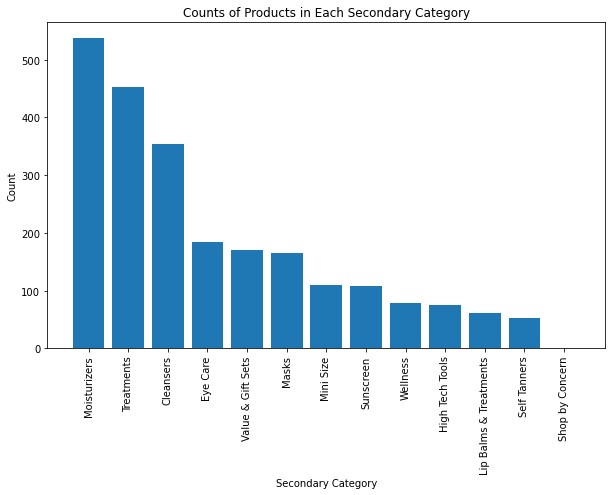

In [36]:
# Visualize to see the counts of different items in the secondary category
category_counts = filtered_products['secondary_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts)
plt.xlabel('Secondary Category')
plt.ylabel('Count')
plt.title('Counts of Products in Each Secondary Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [37]:
filtered_products['tertiary_category'].unique()

array(['Moisturizers', 'Face Serums', 'Eye Creams & Treatments', nan,
       'Face Sunscreen', 'Face Wash & Cleansers', 'Face Oils', 'Toners',
       'Face Masks', 'Facial Peels', 'Decollete & Neck Creams',
       'Exfoliators', 'Eye Masks', 'Facial Rollers', 'Anti-Aging',
       'Face Wipes', 'Blemish & Acne Treatments', 'Night Creams',
       'Mists & Essences', 'Beauty Supplements', 'Body Sunscreen',
       'Sheet Masks', 'For Body', 'Makeup Removers', 'For Face',
       'Facial Cleansing Brushes', 'Blotting Papers', 'BB & CC Creams',
       'Holistic Wellness', 'Teeth Whitening', 'Hair Removal'],
      dtype=object)

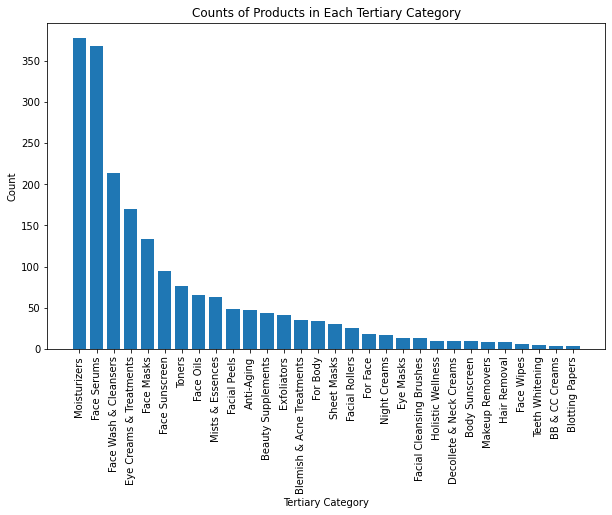

In [38]:
tcategory_counts = filtered_products['tertiary_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(tcategory_counts.index, tcategory_counts)
plt.xlabel('Tertiary Category')
plt.ylabel('Count')
plt.title('Counts of Products in Each Tertiary Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Find the number of reviews for each skincare product
We need to know the number of reviews for each product so we know which products have enough data to train our model.

In [9]:
# Get the number of reviews for each product
review_products_counts = total_reviews['product_id'].value_counts()
review_products_counts.head()

P420652    16138
P7880       8736
P218700     7763
P248407     7547
P269122     7414
Name: product_id, dtype: int64

In [10]:
# Create a data frame of products and review counts
review_products_counts = review_products_counts.reset_index()
new_column_names = {'index': 'product_id', 'product_id': 'counts'}
review_products_counts = review_products_counts.rename(columns=new_column_names)
review_products_counts.head()

,product_id,counts
0,P420652,16138
1,P7880,8736
2,P218700,7763
3,P248407,7547
4,P269122,7414


In [11]:
# Merge with filtered products data frame
merged_products = review_products_counts.merge(filtered_products, on='product_id', how='left')
merged_products.head()

,product_id,counts,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P420652,16138,Lip Sleeping Mask Intense Hydration with Vitam...,6125,LANEIGE,1081315,4.3508,16118.0,0.7 oz/ 20 g,Color,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
1,P7880,8736,Soy Hydrating Gentle Face Cleanser,4348,fresh,282865,4.3628,8733.0,5 oz/ 150 mL,Size,...,0,0,0,"['Clean at Sephora', 'Best for Dry, Combo, Nor...",Skincare,Cleansers,Face Wash & Cleansers,2,71.0,15.0
2,P218700,7763,100 percent Pure Argan Oil,5922,Josie Maran,134089,4.4998,7763.0,1.7 oz/ 50 mL,Size,...,0,0,0,"['Cruelty-Free', 'Clean at Sephora']",Skincare,Moisturizers,Face Oils,2,96.0,18.0
3,P248407,7547,Ultra Repair Cream Intense Hydration,5972,First Aid Beauty,300432,4.5200,7539.0,6 oz/ 170 g,Size,...,0,0,0,"['Best for Dry Skin', 'Community Favorite', 'C...",Skincare,Moisturizers,Moisturizers,3,48.0,18.0
4,P269122,7414,Alpha Beta Extra Strength Daily Peel Pads,5668,Dr. Dennis Gross Skincare,234295,4.5455,7412.0,30 Treatments + 5 Bonus,Size,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Clean a...",Skincare,Treatments,Facial Peels,2,153.0,20.0


In [12]:
# Focus on the moisturizers because that category has the largest number of products
moisterizers_products = merged_products[merged_products['secondary_category'] == 'Moisturizers']
moisterizers_products.head()

,product_id,counts,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
2,P218700,7763,100 percent Pure Argan Oil,5922,Josie Maran,134089,4.4998,7763.0,1.7 oz/ 50 mL,Size,...,0,0,0,"['Cruelty-Free', 'Clean at Sephora']",Skincare,Moisturizers,Face Oils,2,96.0,18.0
3,P248407,7547,Ultra Repair Cream Intense Hydration,5972,First Aid Beauty,300432,4.5200,7539.0,6 oz/ 170 g,Size,...,0,0,0,"['Best for Dry Skin', 'Community Favorite', 'C...",Skincare,Moisturizers,Moisturizers,3,48.0,18.0
5,P394639,7294,The True Cream Aqua Bomb,7075,belif,265050,4.4841,7292.0,1.68 oz/ 50 mL,Size,...,0,0,0,NaN,Skincare,Moisturizers,Moisturizers,2,65.0,22.0
8,P427421,6063,Protini Polypeptide Firming Refillable Moistur...,7083,Drunk Elephant,411372,3.9620,6048.0,1.69 oz/ 50 mL,Size,...,0,0,0,"['Refill Available', 'Good for: Dullness/Uneve...",Skincare,Moisturizers,Moisturizers,3,98.0,22.0
13,P411540,5321,Cicapair Tiger Grass Color Correcting Treatmen...,6014,Dr. Jart+,210786,3.9904,5309.0,1.7 fl. oz/ 50 mL,Size,...,0,0,1,"['Natural Finish', 'Good for: Redness', 'Mediu...",Skincare,Moisturizers,BB & CC Creams,1,21.0,21.0


In [52]:
# Identify the 30 most popular products
sorted_products = merged_products.sort_values(by='counts', ascending=False)
top_30_products = sorted_products.head(30)

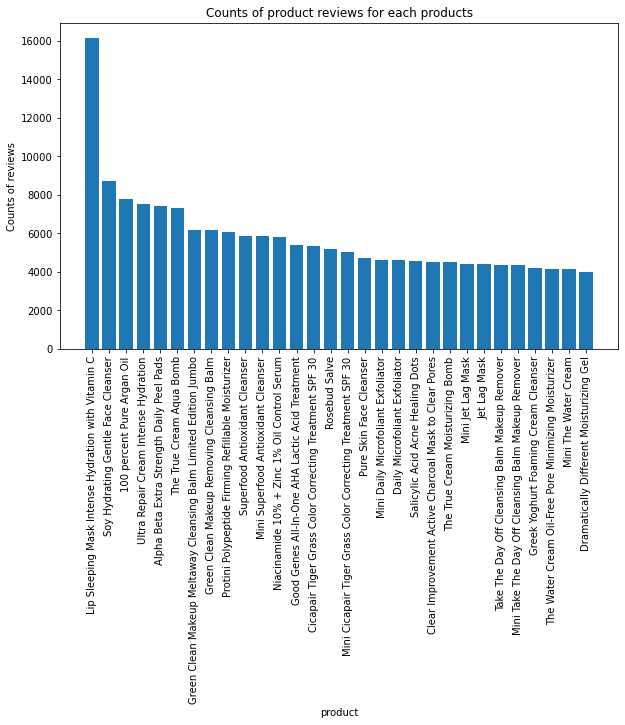

In [54]:
# Plot review counts by product for top 30 products
plt.figure(figsize=(10, 6))
plt.bar(top_30_products['product_name'], top_30_products['counts'])
plt.xlabel('product')
plt.ylabel('Counts of reviews')
plt.title('Counts of product reviews for each products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [55]:
# Only look at the moisturizers
sorted_moisturizers_products = moisterizers_products.sort_values(by='counts', ascending=False)
top30_moisturizers_products = sorted_moisturizers_products.head(30)

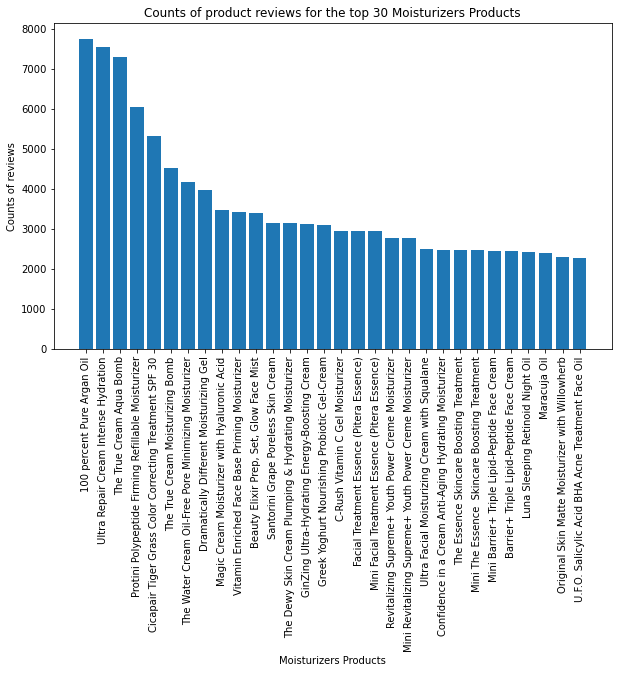

In [56]:
# Plot review counts by product for moisturizers
plt.figure(figsize=(10, 6))
plt.bar(top30_moisturizers_products['product_name'], top30_moisturizers_products['counts'])
plt.xlabel('Moisturizers Products')
plt.ylabel('Counts of reviews')
plt.title('Counts of product reviews for the top 30 Moisturizers Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Distribution Analysis

In [57]:
# Get only the numerical variables
df_num = total_reviews.select_dtypes(include = 'number')

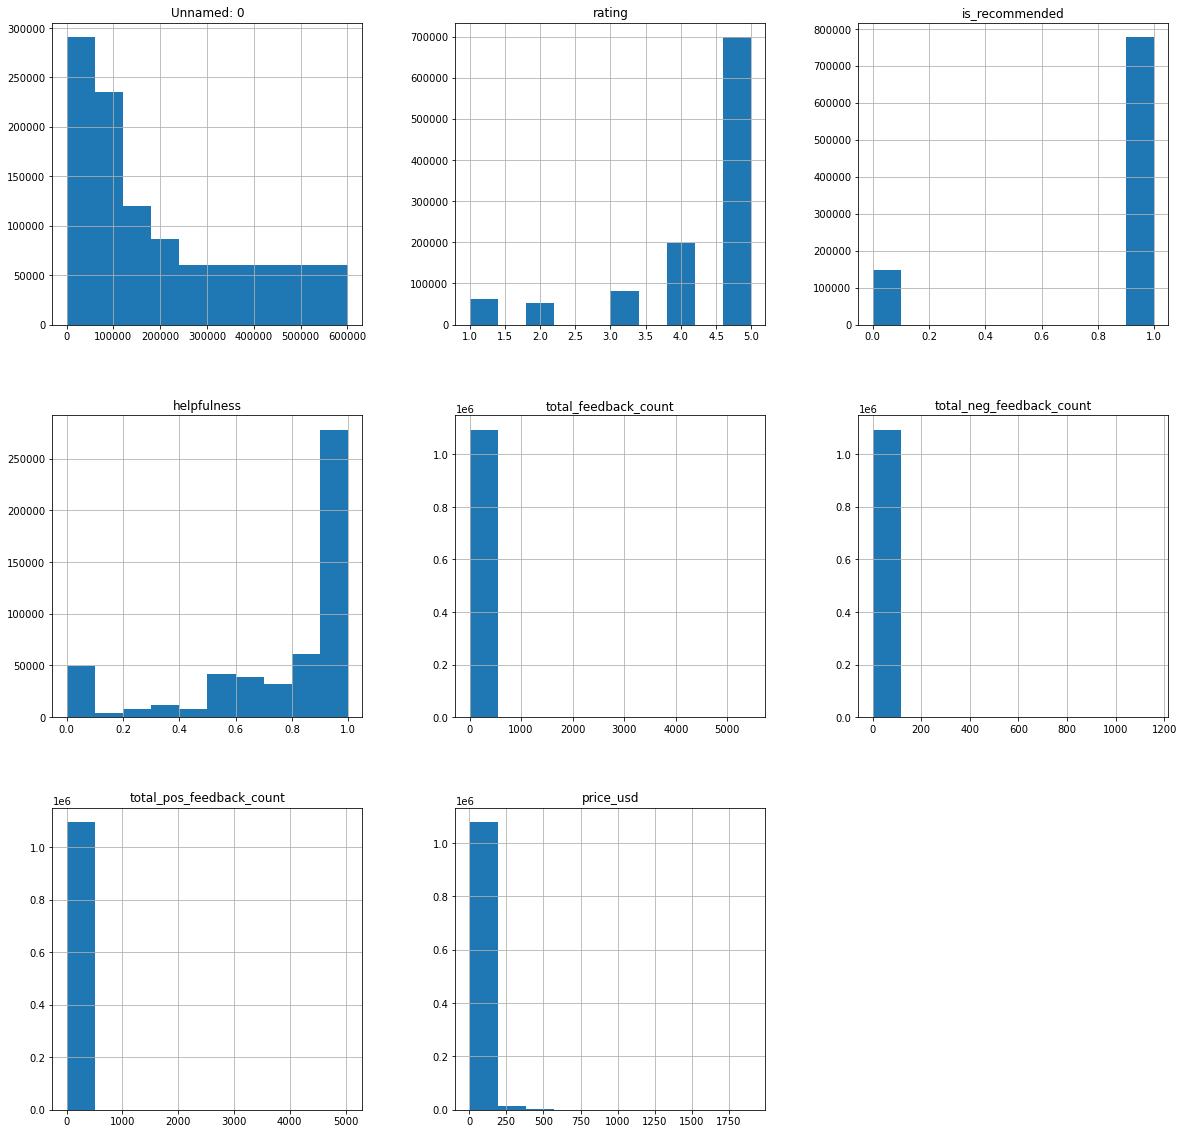

In [58]:
# Plot histograms to visualization numerical variable distributions
df_num.hist(figsize = (20, 20));

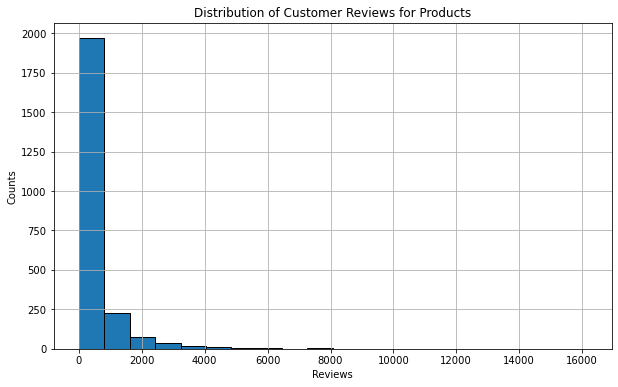

In [59]:
# Visualization total number of reviews distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(review_products_counts['counts'], bins=20, edgecolor='k')
plt.title('Distribution of Customer Reviews for Products')
plt.xlabel('Reviews')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [ ]:
cate_reviews = total_reviews.select_dtypes(include = ['O'])
print('There are {} non numerical features including:\n{}'.format(len(cate_reviews.columns), cate_reviews.columns.tolist()))

There are 11 non numerical features including:
['author_id', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name']


In [ ]:
fig, axes = plt.subplots(round(len(cate_reviews.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(cate_reviews.columns):
        ax.tick_params(axis='x', rotation=45)
        sns.countplot(x=cate_reviews.columns[i], alpha=0.7, data=cate_reviews, ax=ax)

fig.tight_layout()

In [ ]:
merged_products.head()

### Correlation

In [ ]:
df_corr = merged_products.corr(numeric_only = True)
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Missing value

In [13]:
df_na = merged_products.isnull().sum()
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
variation_desc,2338
sale_price_usd,2306
value_price_usd,2212
child_max_price,1952
child_min_price,1952
highlights,414
variation_value,387
tertiary_category,352
variation_type,339
size,333


In [14]:
df_na = total_reviews.isnull().sum()
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
helpfulness,561592
review_title,310654
hair_color,226768
eye_color,209628
skin_tone,170539
is_recommended,167988
skin_type,111557
review_text,1444


Text(0.5, 1.0, 'Percent missing data by features')

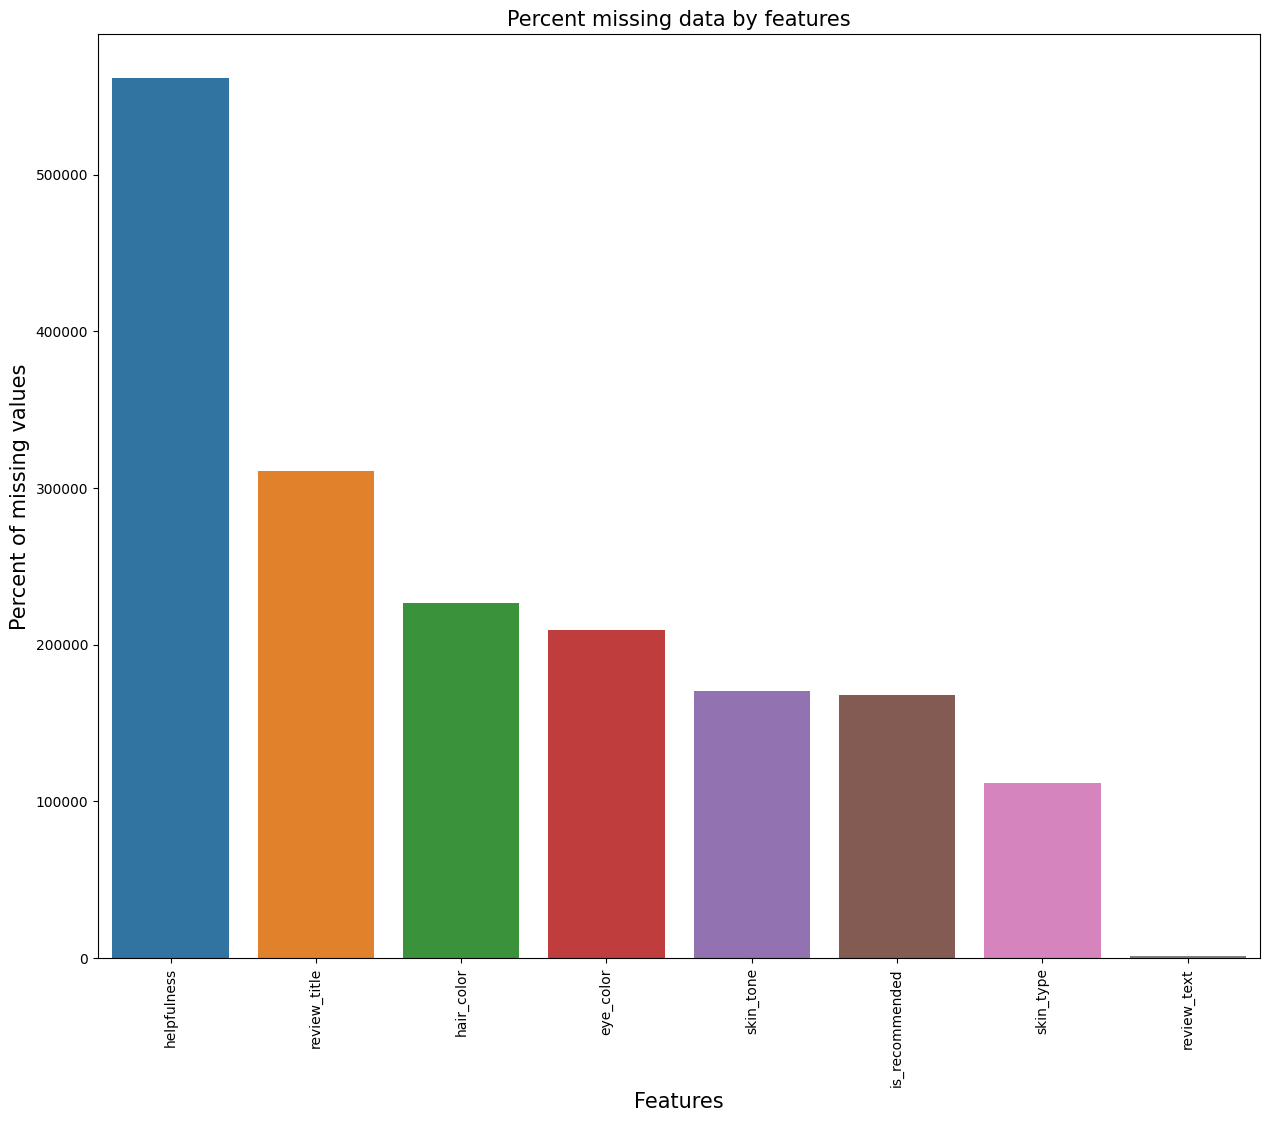

In [ ]:
# Visualize the missing ratios
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

In [ ]:
total_reviews.shape

### Deal with Missing Data

In [15]:
# Get rid off all the dataframe where hair_color, eye_olor, and skin_tone are not null
filtered_reviews = total_reviews.dropna(subset=["skin_tone", "eye_color", "skin_type", "hair_color"], how="any")

In [16]:
filtered_reviews.shape

(844865, 19)

## Information for the two dataframe

In [ ]:
filtered_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 89 to 8428
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2351 non-null   object 
 1   product_name        2351 non-null   object 
 2   brand_id            2351 non-null   int64  
 3   brand_name          2351 non-null   object 
 4   loves_count         2351 non-null   int64  
 5   rating              2351 non-null   float64
 6   reviews             2351 non-null   float64
 7   size                2018 non-null   object 
 8   variation_type      2012 non-null   object 
 9   variation_value     1964 non-null   object 
 10  variation_desc      13 non-null     object 
 11  ingredients         2224 non-null   object 
 12  price_usd           2351 non-null   float64
 13  value_price_usd     139 non-null    float64
 14  sale_price_usd      45 non-null     float64
 15  limited_edition     2351 non-null   int64  
 16  new  

In [ ]:
total_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

## Filter out only the moisturizers

Our ultimate recommendation system will depend on the category of skincare products that the customer wants. We will start off with moisturizers because this is the category of skincare products that has the largest number of products. If time permits, we will train models for other skincare product categories.



In [17]:
moisturizers_products = filtered_products[filtered_products['secondary_category'] == 'Moisturizers']

In [18]:
moisturizers_reviews = filtered_reviews[filtered_reviews['product_id'].isin(moisturizers_products['product_id'])]

In [ ]:
moisturizers_reviews.shape

(224772, 19)

#### Find how many reviews are there for each product

Our recommendation system requires us to train a model for each product because we want to predict how customers with a certain set of physical attributes would rate a certain product. Thus, counting the number of reviews for each product is important because we want to ensure that we have enough data for training.

In [19]:
moisturizers_product_names = moisturizers_reviews['product_id'].unique()

In [20]:
num_of_moisturizers_reviews = []
for name in moisturizers_product_names:
  num_of_reviews = len(moisturizers_reviews[moisturizers_reviews['product_id'] == name])
  num_of_moisturizers_reviews.append(num_of_reviews)

In [21]:
d = {'moisturizer_products': moisturizers_product_names, 'number_of_reviews': num_of_moisturizers_reviews}
num_moisturizers_reviews = pd.DataFrame(data = d)

In [ ]:
len(num_moisturizers_reviews[num_moisturizers_reviews['number_of_reviews'] != 0])/len(num_moisturizers_reviews)

1.0

In [ ]:
len(num_moisturizers_reviews[num_moisturizers_reviews['number_of_reviews'] >= 1000])

64

In [ ]:
len(num_moisturizers_reviews[num_moisturizers_reviews['number_of_reviews'] >= 2000])

23

#### Conclusion: All of the moisturizer products have been reviewed. There are 64 products with reviews over 1000 and 23 products with reviews over 2000
Later in this notebook, we will do some baseline modeling with linear regression to determine the if 1,000 or 2,000 reviews is the better cutoff. Overall, we need pick a large enough cutoff because:
1.   We need to make sure there is enough data on each product for training.
2.   Since we need to train a model for each product, we want to avoid excessive computation cost. Thus, training 24 models make more sense than training 64 models.
3. In general, customers tend to prefer purchasing products that have been frequently reviewed by other customers.

### Check Skewness of Values and Engineer New Feature called recommendation_scores to resolve the skewness of data

In [22]:
moisturizers_reviews.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [23]:
from scipy.stats import skew

numeric_feats = ['rating', 'is_recommended', 'helpfulness']

# Check the skew of all numerical features
skewed_feats = moisturizers_reviews[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
helpfulness,-1.355496
rating,-1.676016
is_recommended,-1.916030


All the columns above are skewed to the left, meaning they have more data on the higher end. We want to resolve the skewness, since we don't want the model to predict 80% of the products as having a rating of 5, that would be very hard to make recommendation

To address skewness, let us combine all three columns to engineer a new feature.

In [24]:
# First, I want to check if rating and is_recommended always align with each other.
# It turns out not, so is_recommended can be taken into account
rows_with_rating_5_not_recommended = moisturizers_reviews[
    (moisturizers_reviews['rating'] == 5) & (moisturizers_reviews['is_recommended'] != 1)
]

# Get the number of rows meeting the criteria
num_rows = len(rows_with_rating_5_not_recommended)

print(f"Number of rows with rating 5 and is_recommended not equal to 1: {num_rows}")


Number of rows with rating 5 and is_recommended not equal to 1: 194


In [25]:
# Before engineering new features, address NaN in helpfulness
# Replace NaN values with the mean of the 'helpfulness' column
mean_helpfulness = moisturizers_reviews['helpfulness'].mean()
moisturizers_reviews['helpfulness'].fillna(mean_helpfulness, inplace=True)

In [26]:
# Engineer new feature: (recommendation_scores = (rating + is_recommended)*helpfulness)**2
# squaring the data to provide a wider interval and make the skewness better
moisturizers_reviews.loc[:, 'recommendation_scores'] = ((moisturizers_reviews['rating'] + moisturizers_reviews['is_recommended']) * moisturizers_reviews['helpfulness'])**2

In [27]:
# check skewness of this new feature
skewness_rec = moisturizers_reviews['recommendation_scores'].skew()

# Print the skewness
print(f"Skewness of 'recommendation_scores': {skewness_rec}")

Skewness of 'recommendation_scores': -0.09575793365403244


<Axes: >

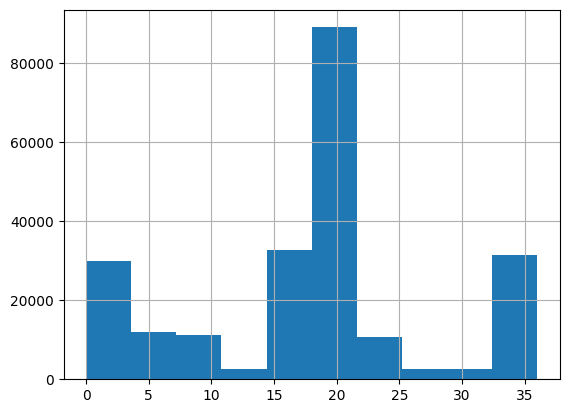

In [ ]:
# Plot the histogram of this new feature
moisturizers_reviews['recommendation_scores'].hist()

We have successfully changed the distribution to reduce skewness. (Note that, according to an error message, the Box Cox transformation would not work for our purposes because the interval is too small.)

#### Prepare Data

In [ ]:
num_moisturizers_reviews.head()

,moisturizer_products,number_of_reviews
0,P218700,925
1,P248407,2006
2,P394639,5429
3,P427421,5734
4,P411540,4478


In [28]:
# first select the moisturizer products with reviews over 1000
moist_products_1000 = num_moisturizers_reviews[num_moisturizers_reviews['number_of_reviews'] >= 1000]['moisturizer_products']
moisturizers_reviews_1000 = moisturizers_reviews[moisturizers_reviews['product_id'].isin(moist_products_1000)]

In [29]:
# get the names of all the products
moist_productnames_1000 = moisturizers_reviews_1000['product_id'].unique()

In [ ]:
moist_productnames_1000[:10]

array(['P248407', 'P394639', 'P427421', 'P411540', 'P394624', 'P418218',
       'P270594', 'P433520', 'P480612', 'P441101'], dtype=object)

In [30]:
# Select the moisturizer products with reviews over 2000
moist_products_2000 = num_moisturizers_reviews[num_moisturizers_reviews['number_of_reviews'] >= 2000]['moisturizer_products']
moisturizers_reviews_2000 = moisturizers_reviews[moisturizers_reviews['product_id'].isin(moist_products_2000)]
# get the names of all the products
moist_productnames_2000 = moisturizers_reviews_2000['product_id'].unique()

In [ ]:
moist_productnames_2000[:10]

array(['P248407', 'P394639', 'P427421', 'P411540', 'P394624', 'P418218',
       'P270594', 'P433520', 'P480612', 'P441101'], dtype=object)

## Data modeling

In [31]:
# Import machine learning functions from relevant packages

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

#### Linear Regression
We will first predict "rating" and then predict "recommendation_scores" to see how the results compare. We will do this separately for moisturizers with over 1,000 reviews and those with over 2,000 reviews.

1. Over 1000

In [43]:
cv_scores_mae = []
cv_scores_r2 = []

for product in moist_productnames_1000:
  individual_product_data = moisturizers_reviews_1000[moisturizers_reviews_1000['product_id'] == product]
  X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
  y = individual_product_data['rating']
  X_num = pd.get_dummies(X)
  #X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)
  model = LinearRegression()#.fit(X_train, y_train)

  # Use cross_validation to evaluate performance
  cv_mae = cross_val_score(model, X_num, y, cv=5, scoring='neg_mean_absolute_error')
  mean_cv_mae = -np.mean(cv_mae)
  cv_scores_mae.append(mean_cv_mae)

  cv_r2 = cross_val_score(model, X_num, y, cv=5, scoring='r2')
  mean_cv_r2 = -np.mean(cv_r2)
  cv_scores_r2.append(mean_cv_r2)

In [44]:
d = {'product_id': moist_productnames_1000, 'cv_mean_absolute_error': cv_scores_mae, 'cv_r2': cv_scores_r2}
lr_model_moisturizers_1000 = pd.DataFrame(data = d)
lr_model_moisturizers_1000.head()

,product_id,cv_mean_absolute_error,cv_r2
0,P248407,9.459326e-01,6.353813e-02
1,P394639,8.750956e+10,4.862414e+24
2,P427421,2.575126e+10,1.054297e+24
3,P411540,6.284003e+10,3.513632e+24
4,P394624,6.326200e-01,2.016781e-02


##### Evaluation of Linear Regression

In [45]:
print("the mean absolute error is ", lr_model_moisturizers_1000['cv_mean_absolute_error'].mean())
print("the r2 is ", lr_model_moisturizers_1000['cv_r2'].mean())

the mean absolute error is  60505041604.358055
the r2 is  2.8568257469050515e+24


2. over 2000

In [46]:
cv_scores_mae = []
cv_scores_r2 = []

for product in moist_productnames_2000:
  individual_product_data = moisturizers_reviews_2000[moisturizers_reviews_2000['product_id'] == product]
  X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
  y = individual_product_data['rating']
  X_num = pd.get_dummies(X)
  #X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)
  model = LinearRegression()#.fit(X_train, y_train)

  # Use cross_validation to evaluate performance
  cv_mae = cross_val_score(model, X_num, y, cv=5, scoring='neg_mean_absolute_error')
  mean_cv_mae = -np.mean(cv_mae)
  cv_scores_mae.append(mean_cv_mae)

  cv_r2 = cross_val_score(model, X_num, y, cv=5, scoring='r2')
  mean_cv_r2 = -np.mean(cv_r2)
  cv_scores_r2.append(mean_cv_r2)


In [47]:
d = {'product_id': moist_productnames_2000, 'cv_mean_absolute_error': cv_scores_mae, 'cv_r2': cv_scores_r2}
lr_model_moisturizers_2000 = pd.DataFrame(data = d)
lr_model_moisturizers_2000.head()

,product_id,cv_mean_absolute_error,cv_r2
0,P248407,9.459326e-01,6.353813e-02
1,P394639,8.750956e+10,4.862414e+24
2,P427421,2.575126e+10,1.054297e+24
3,P411540,6.284003e+10,3.513632e+24
4,P394624,6.326200e-01,2.016781e-02


In [48]:
print("the mean absolute error is ", lr_model_moisturizers_2000['cv_mean_absolute_error'].mean())
print("the r2 is ", lr_model_moisturizers_2000['cv_r2'].mean())

the mean absolute error is  14842447622.492073
the r2 is  5.0695245936805413e+23


With reviews above 2000, the performance is better. Probably due to more data

3. Try with the new features plus above 2000

In [40]:
cv_scores_mae = []
cv_scores_r2 = []

for product in moist_productnames_2000:
  individual_product_data = moisturizers_reviews_2000[moisturizers_reviews_2000['product_id'] == product]
  X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
  y = individual_product_data['recommendation_scores']
  X_num = pd.get_dummies(X)
  #X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)
  model = LinearRegression()#.fit(X_train, y_train)

  # Use cross_validation to evaluate performance
  cv_mae = cross_val_score(model, X_num, y, cv=5, scoring='neg_mean_absolute_error')
  mean_cv_mae = -np.mean(cv_mae)
  cv_scores_mae.append(mean_cv_mae)

  cv_r2 = cross_val_score(model, X_num, y, cv=5, scoring='r2')
  mean_cv_r2 = -np.mean(cv_r2)
  cv_scores_r2.append(mean_cv_r2)


In [41]:
d2 = {'product_id': moist_productnames_2000, 'cv_mean_absolute_error': cv_scores_mae, 'cv_r2': cv_scores_r2}
lr_model_moisturizers_2000_rec = pd.DataFrame(data = d2)
lr_model_moisturizers_2000_rec.head()

,product_id,cv_mean_absolute_error,cv_r2
0,P248407,8.910084e+00,3.200354e-02
1,P394639,2.470469e+11,5.627054e+23
2,P427421,2.212859e+11,1.096753e+24
3,P411540,4.092892e+11,2.712748e+24
4,P394624,5.963723e+00,2.191855e-02


In [42]:
print("the mean absolute error is ", lr_model_moisturizers_2000_rec['cv_mean_absolute_error'].mean())
print("the r2 is ", lr_model_moisturizers_2000_rec['cv_r2'].mean())

the mean absolute error is  86287676725.55544
the r2 is  2.6827539337947625e+23


Overall, it seems that model performance is better with the set of moisturizers with over 2,000 reviews. Therefore, from here, we will only focus on those 23 moisturizers with over 2,000 reviews.






#### Random Forest
Let us first try the default hyperparameters to predict the recommendation scores.

In [71]:
cv_scores_mae = []
cv_scores_r2 = []

for product in moist_productnames_2000:
    individual_product_data = moisturizers_reviews_2000[moisturizers_reviews_2000['product_id'] == product]
    X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
    y = individual_product_data['recommendation_scores']
    X_num = pd.get_dummies(X)
    #X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)
    
    # Create a Random Forest Regressor
    rf_regressor = RandomForestRegressor(random_state=0)
    
    # Train the model
    #rf_regressor.fit(X_train, y_train)
    
    # Use cross_validation to evaluate performance
    cv_mae = cross_val_score(rf_regressor, X_num, y, cv=5, scoring='neg_mean_absolute_error')
    mean_cv_mae = -np.mean(cv_mae)
    cv_scores_mae.append(mean_cv_mae)
    
    cv_r2 = cross_val_score(rf_regressor, X_num, y, cv=5, scoring='r2')
    mean_cv_r2 = -np.mean(cv_r2)
    cv_scores_r2.append(mean_cv_r2)


In [72]:
d = {'product_id': moist_productnames_2000, 'cv_mean_absolute_error': cv_scores_mae, 'cv_r2': cv_scores_r2}
rf_model_moisturizers_2000 = pd.DataFrame(data = d)
rf_model_moisturizers_2000.head()

,product_id,cv_mean_absolute_error,cv_r2
0,P248407,9.546052,0.153247
1,P394639,6.627167,0.071506
2,P427421,9.790072,0.098632
3,P411540,9.779117,0.105623
4,P394624,6.495280,0.093808


##### Evaluation of random forest with default hyperparameters:

In [73]:
print("the mean absolute error is ", rf_model_moisturizers_2000['cv_mean_absolute_error'].mean())
print("the r2 is ", rf_model_moisturizers_2000['cv_r2'].mean())

the mean absolute error is  7.570409720455249
the r2 is  0.16489653736722884


##### Try Fine-tuning
We will only do this for the a randomly chosen product because grid search is highly computationally expensive. We will use the best hyperparameters for the remaining products. 

In [53]:
moist_productnames_1000[0]

'P248407'

In [66]:
import warnings
warnings.filterwarnings("ignore")

# Set a random state for reproducibility
np.random.RandomState(seed = 0)

# Randomly choose a product
chosen = np.random.choice(range(len(moist_productnames_2000)))

# Split data 
individual_product_data = moisturizers_reviews_2000[moisturizers_reviews_2000['product_id'] == moist_productnames_2000[chosen]]
X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
y = individual_product_data['recommendation_scores']
X_num = pd.get_dummies(X)
#X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)

# Define the parameter grid
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['auto', 'sqrt', 'log2']}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, n_jobs = -1)

# Fit the model to the data
grid_search.fit(X_num, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
#best_rf_model = grid_search.best_estimator_
#y_pred = best_rf_model.predict(X_test)

# make prediction on train set
#y_pred_train = best_rf_model.predict(X_train)

# Evaluate the model
# train_mse.append(mean_squared_error(y_train, y_pred_train))
# test_mse.append(mean_squared_error(y_test, y_pred))

#print(mean_squared_error(y_test, y_pred))
#print(r2_score(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

In [74]:
cv_scores_mae = []
cv_scores_r2 = []

for product in moist_productnames_2000:
    individual_product_data = moisturizers_reviews_2000[moisturizers_reviews_2000['product_id'] == product]
    X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
    y = individual_product_data['recommendation_scores']
    X_num = pd.get_dummies(X)
    #X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)
    
    # Create a Random Forest Regressor
    rf_regressor = RandomForestRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 50, random_state=0)
    
    # Train the model
    #rf_regressor.fit(X_train, y_train)
    
    # Use cross_validation to evaluate performance
    cv_mae = cross_val_score(rf_regressor, X_num, y, cv=5, scoring='neg_mean_absolute_error')
    mean_cv_mae = -np.mean(cv_mae)
    cv_scores_mae.append(mean_cv_mae)
    
    cv_r2 = cross_val_score(rf_regressor, X_num, y, cv=5, scoring='r2')
    mean_cv_r2 = -np.mean(cv_r2)
    cv_scores_r2.append(mean_cv_r2)


In [75]:
d = {'product_id': moist_productnames_2000, 'cv_mean_absolute_error': cv_scores_mae, 'cv_r2': cv_scores_r2}
rf_model_moisturizers_2000 = pd.DataFrame(data = d)
rf_model_moisturizers_2000.head()

,product_id,cv_mean_absolute_error,cv_r2
0,P248407,8.934406,0.037643
1,P394639,6.347472,0.006307
2,P427421,9.600476,0.023792
3,P411540,9.559459,0.020188
4,P394624,6.011192,0.017339


##### Evaluation of random forest with tuning

In [76]:
print("the mean absolute error is ", rf_model_moisturizers_2000['cv_mean_absolute_error'].mean())
print("the r2 is ", rf_model_moisturizers_2000['cv_r2'].mean())

the mean absolute error is  7.237015331834539
the r2 is  0.04523727033299155


Based on fine-tuning result, it appears that the mean MAE value is lower for the tuned mode, whereas the mean R^2 value is higher for the default mode. 

#### MLP Neural Network

In [2]:
import warnings
warnings.filterwarnings("ignore")

cv_scores_mae = []
cv_scores_r2 = []

for product in moist_productnames_2000:
  individual_product_data = moisturizers_reviews_2000[moisturizers_reviews_2000['product_id'] == product]
  X = individual_product_data[['skin_tone', 'eye_color', 'skin_type', 'hair_color']]
  y = individual_product_data['recommendation_scores']
  X_num = pd.get_dummies(X)
  X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state = 0)

  # Create an MLP Regressor
  mlp_regressor = MLPRegressor(hidden_layer_sizes=(5, ), max_iter=500, random_state=0) # initially tried 100 layers but that took too long

  # Train the model
  mlp_regressor.fit(X_train, y_train)

  # Use cross_validation to evaluate performance
  cv_mae = cross_val_score(mlp_regressor, X_num, y, cv=5, scoring='neg_mean_absolute_error')
  mean_cv_mae = -np.mean(cv_mae)
  cv_scores_mae.append(mean_cv_mae)

  cv_r2 = cross_val_score(mlp_regressor, X_num, y, cv=5, scoring='r2')
  mean_cv_r2 = -np.mean(cv_r2)
  cv_scores_r2.append(mean_cv_r2)

NameError: ignored

Evaluation of MLP Model

In [ ]:
d2 = {'product_id': moist_productnames_2000, 'cv_mean_absolute_error': cv_scores_mae, 'cv_r2': cv_scores_r2}
mlp_model_moisturizers_2000_rec = pd.DataFrame(data = d2)
mlp_model_moisturizers_2000_rec.head()

,product_id,cv_mean_absolute_error,cv_r2
0,P248407,8.983684,0.036237
1,P394639,6.536975,0.047474
2,P427421,9.713211,0.060324
3,P411540,9.653452,0.066256
4,P394624,6.337914,0.058366


In [ ]:
print("the mean absolute error is ", mlp_model_moisturizers_2000_rec['cv_mean_absolute_error'].mean())
print("the r2 is ", mlp_model_moisturizers_2000_rec['cv_r2'].mean())

the mean absolute error is  7.383971264806143
the r2 is  0.09661215078869055


Now that we have evaluated our model choice, we can finally build our skincare recommender system.

In [ ]:
def recommender(features, category):
  '''
  Takes the customer's physical attributes and desired skincare product category as inputs
  Returns the product with the highest recommendation score for the customer.
  '''
  # Predict ratings on products on the selected category

  # Pick product with highest predicted rating


pass